**Final Assignment: Regression(Insurance.csv)**
* Name: Biwas Pudasaini
* Student Id: 2116280
* Author: Siman Giri
* Co-Author: Anmol Adhikari


#**Overview**

**Kaggle dataset link: https://www.kaggle.com/datasets/mirichoi0218/insurance**

With the features at our availability, we will use the insurance dataset in this task to forecast the insurance costs. In order to anticipate the costs of insurance, we will use the notion of multiple linear regression and the insurance dataset. To design the best medical insurance plans, the insurer needs historical data to estimate each user's medical expenses. This data can be used by a medical insurer to develop more accurate pricing models, forecast particular insurance outcomes, or manage huge portfolios. In each of these scenarios, the objective is to predict insurance costs with precision.

# **Necessary Mount and Imports**

In [ ]:
# Necessary imports:
import numpy as np # A library for numerical computing in Python
import matplotlib.pyplot as plt # A plotting library for creating visualizations
import seaborn as sns # A library for statistical data visualization
import pandas as pd # A library for data manipulation and analysis
import plotly.express as px # A library for creating interactive visualizations

In [ ]:
# Importing the "drive" module from the "google.colab" library
from google.colab import drive

# Mounting the Google Drive to the "/content/drive" path
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This line of code sets the file path for the "Insurance.csv" file 
# stored in the "MyDrive/AI-FinalAssignment" folder in Google Drive
path_data = "/content/drive/MyDrive/AI-FinalAssignment/Insurance.csv"


In [ ]:
# Load the data from the file path into a Pandas DataFrame
biwas = pd.read_csv(path_data)


# **Data Understanding**


The insurance.csv dataset contains information about various insurance policies and the charges associated with them. It has 7 columns and 1338 rows. The dependent variable "charges" represents the outcome that we are trying to predict based on the independent variables. The independent variables in the dataset are "age", "sex", "bmi", "children", "smoker", and "region".

The age column indicates the age of the policy holder, while the sex column indicates the gender of the policy holder. The bmi (Body Mass Index) column represents the body weight of the policy holder relative to their height, and is commonly used to determine if a person is overweight or underweight. The children column represents the number of children that the policy holder has. The smoker column indicates whether the policy holder is a smoker or not. Finally, the region column represents the geographical region where the policy holder resides.

The relationship between the independent variables and the dependent variable "charges" can be analyzed to determine the factors that contribute most to the cost of insurance policies. For example, we can see from the dataset that smokers tend to have lower bmi and higher charges compared to non-smokers. This can be interpreted as smoking having a negative impact on a person's health, and thus leading to higher insurance costs. Additionally, the geographical region of the policy holder can also affect the cost of insurance.

The insurance.csv dataset can be used to train machine learning models such as linear regression or decision tree regression to predict the charges of insurance policies based on the independent variables. This can be useful for insurance companies to determine the cost of policies for potential customers based on their age, sex, bmi, number of children, smoking status, and geographical region. The accuracy of the prediction model can be evaluated using metrics such as mean squared error and R-squared.

Overall, the insurance.csv dataset provides valuable information about the cost of insurance policies and the factors that contribute to the cost. By using this dataset, we can gain a better understanding of the relationship between the independent variables and the dependent variable "charges". This information can be used to develop predictive models and make informed decisions about insurance policies.

In [ ]:
# Check the data type and memory usage of each column in the dataframe
biwas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


datareg.info() will give us all the information about my datasets. where this function will tells us how many rows and colums i have used, null values used in this datsets, data type and many more. 

In [ ]:
# Retrieve the column names of the DataFrame
biwas.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
print(biwas.shape) # printing the shape of the columns in dataset                            
    

(1338, 7)


In [ ]:
# Generate descriptive statistics of the "biwas" object
biwas.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# from corr function we can find the correlation between the columns.
biwas.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
# Check for missing values in the "biwas" object and return a Boolean mask indicating their presence
biwas.isnull()


,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
# Count the number of missing values in the "biwas" object
biwas[biwas.isnull()].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Here, we're attempting to determine whether or not this dataset has any duplicate values.
print('There are',biwas.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 1 duplicate values in the dateset.


In [ ]:
# Remove duplicate values from the dataframe
biwas = biwas.drop_duplicates()

# Get the shape of the updated dataframe and print the result
biwas.shape


(1337, 7)

In [ ]:
# Display the first five rows of the data in the "biwas" object
biwas.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Display the last five rows of the data in the "biwas" object
biwas.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
#Display the random five rows of data 
biwas.sample(5)


,age,sex,bmi,children,smoker,region,charges
422,40,male,32.775,1,yes,northeast,39125.33225
604,19,female,28.310,0,yes,northwest,17468.98390
1176,52,female,24.130,1,yes,northwest,23887.66270
226,28,male,38.060,0,no,southeast,2689.49540
859,57,male,28.100,0,no,southwest,10965.44600


In [ ]:
# Check for missing values in the "biwas" object and return a Boolean mask indicating their presence
biwas.isnull()


,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
#check the data from the column 'smoker'
biwas['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1337, dtype: object

here i have map the datasets of smoker conating yes and no values along with the number of length and datatype as well.

In [ ]:
biwas[biwas.isnull()].count() # checking missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This function will check if there is any value missing or not from my datasets.


# **Data Visualization (Graphical Representataion of different Columns)**

In [ ]:
# Plot the histogram of the 'age' column of the biwas DataFrame using Plotly Express
fig = px.histogram(biwas, x='age', nbins=30, color='age', marginal='box')

# Add a title to the histogram
fig.update_layout(title_text="Histogram of Age")

# Show the plot
fig.show()

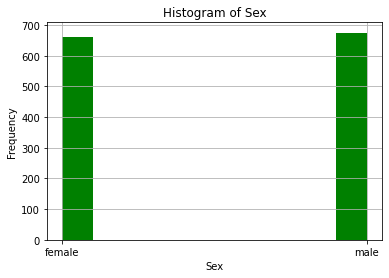

In [ ]:


# Plot the histogram of the 'sex' column of the biwas DataFrame
biwas['sex'].hist(color='green')

# Add a title to the histogram
plt.title("Histogram of Sex")

# Add x-axis label
plt.xlabel("Sex")

# Add y-axis label
plt.ylabel("Frequency")

# Show the plot
plt.show()


This is a Histogram of sex columns i have used in this datasets. from the above histogram we can clearly see that the number of male and female used in my datasets are similarly similar but the male has a little bit more number than female.

In [ ]:
# Plot the histogram of the 'bmi' column of the biwas DataFrame using Plotly Express
fig = px.histogram(biwas, x='bmi', nbins=30, color='bmi', marginal='box')

# Add a title to the histogram
fig.update_layout(title_text="Histogram of BMI")

# Show the plot
fig.show()


This is a histogram of bmi i have used in my datasets using matplotlib library. Which shows the data of bmi varies from each other where the data range from 20-25 has the greatest bmi rate and 50 has the lowest bmi rate.

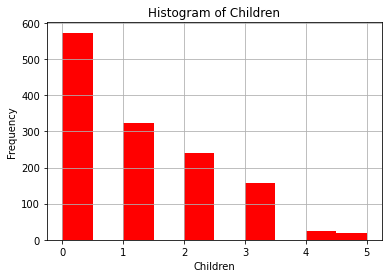

In [ ]:

# Plot the histogram of the 'children' column of the datareg DataFrame
biwas['children'].hist(color='red')

# Add a title to the histogram
plt.title("Histogram of Children")

# Add x-axis label
plt.xlabel("Children")

# Add y-axis label
plt.ylabel("Frequency")

# Show the plot
plt.show()


This is a histogram of children i have used in my datasets using matplotlib library which shows the data of childrens used in this datasets .

In [ ]:
# Plot the histogram of the 'charges' column of the biwas DataFrame using Plotly Express
fig = px.histogram(biwas, x='charges', nbins=30, color='charges', marginal='box')

# Add a title to the histogram
fig.update_layout(title_text="Histogram of Charges")

# Show the plot
fig.show()


This is a histrogram which shows the data between charges which ranges from 0-60000 in x axis and 0-500 in y axis.

In [ ]:

# Plot the bar plot of the 'smoker' column of the biwas DataFrame using Plotly Express
fig = px.bar(biwas, x=biwas.index,y='smoker',color='smoker')

# Add a title to the bar plot
fig.update_layout(title_text="Bar Plot of Smoker Count")

# Show the plot
fig.show()



In [ ]:

# Plot the histogram plot of the 'region' column of the biwas DataFrame using Plotly Express
fig = px.histogram(biwas,x='charges', nbins=30, color='region')

# Add a title to the histogram plot
fig.update_layout(title_text="Histogram Plot of Region Count")

# Show the plot
fig.show()


This is a Histogram of region column where i have descibe about the four different region i have used in my datasets i.e southwest, southeast, northwest and northeast. where we can see that the no of people ate southeast is more than other regiona and other three region has the similar number of people living over there.

In [ ]:

# Plot the boxplot of the 'charges' column by 'sex' using Plotly Express
fig = px.box(biwas, x="sex", y="charges", points="all")

# Add a title to the boxplot
fig.update_layout(title_text="Box Plot of Charges by Sex")

# Show the plot
fig.show()


Box plots is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.
This is a Box-plot which shows the data between male and female compared with the charges the final outcomes. While comparing the two variable male and female we can see that the average value of male is more than female which shows that the box plot of male is bigger than female in case of charges. which shows male has more charges than female.

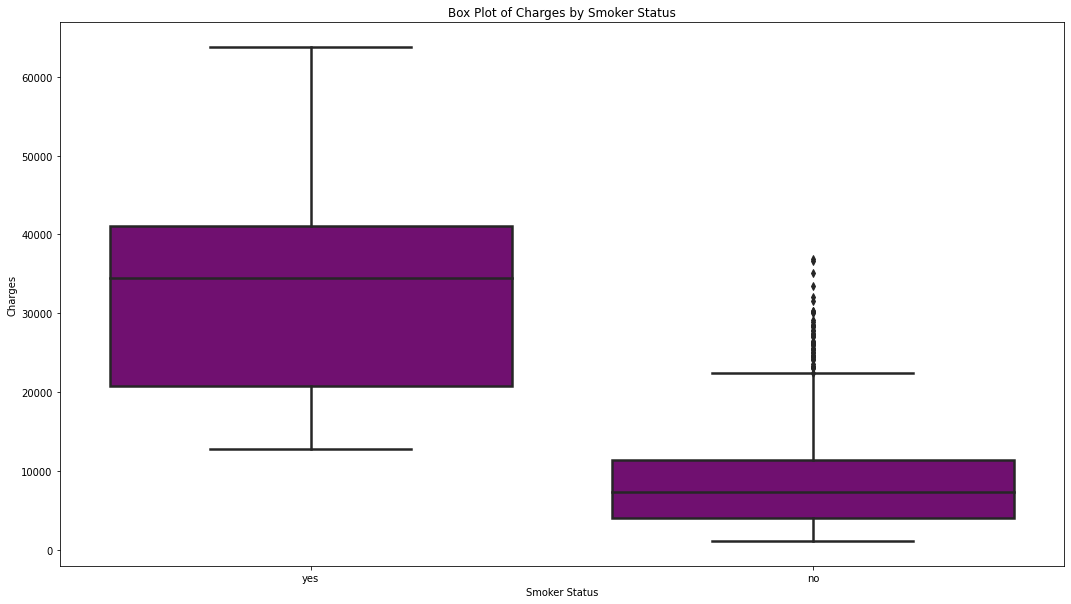

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(18, 10))

# Plot the boxplot of the 'charges' column by 'smoker' using seaborn
ax = sns.boxplot(x="smoker", y="charges", data=biwas, color='purple', linewidth=2.5)

# Add a title to the boxplot
plt.title("Box Plot of Charges by Smoker Status")

# Add x-axis label
plt.xlabel("Smoker Status")

# Add y-axis label
plt.ylabel("Charges")

# Show the plot
plt.show()


Box plots is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages. where in this box plot we can see that the male has more charges value as compared to the female one.Where the box plot of female is very thin as compared to the average value of male in the case of charges.
This is a box plot showing the data between where the blue one represents the smoker and light brown represents the non smoker . From the above box plot we can see that the average vale of smoker is more while comparing between two and it clearly shows the box plot of blue is greater than light brown.

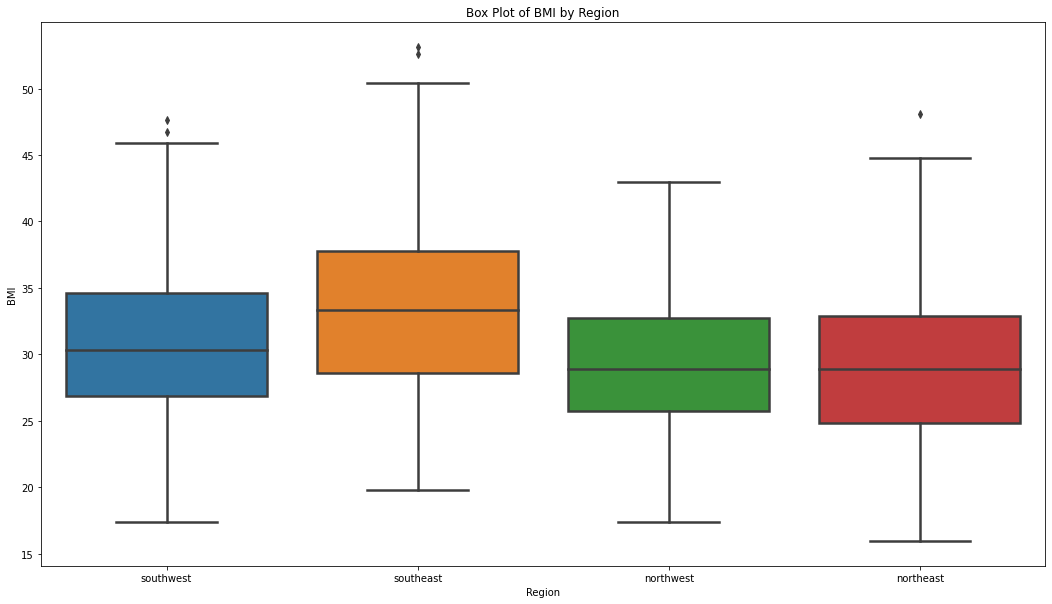

In [ ]:

# Create a figure with a specified size
plt.figure(figsize=(18, 10))

# Plot the boxplot of the 'bmi' column by 'region' using seaborn
ax = sns.boxplot(x="region", y="bmi", data=biwas, linewidth=2.5)

# Add a title to the boxplot
plt.title("Box Plot of BMI by Region")

# Add x-axis label
plt.xlabel("Region")

# Add y-axis label
plt.ylabel("BMI")

# Show the plot
plt.show()


Box plots is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.
This is  boc-plot which shows the relationship between bmi and the four region. the firt southwest is blue in colour,south east is light brown in colour, northwest is green in colour and northeast is red in colour respectively.While comparing the average value of the region with the bmi it shows that the southeast has more average value and northeast and northwest has lowest one while southwest comes in middle in case of bmi and region value.

In [ ]:

# Create the boxplot of the 'charges' column by 'region' using Plotly Express
fig = px.box(biwas, x='region', y='charges')

# Add a title to the boxplot
fig.update_layout(title_text="Box Plot of Charges by Region")

# Show the plot
fig.show()


In [ ]:

# Create the boxplot of the 'bmi' column by 'sex' using Plotly Express
fig = px.box(biwas, x='sex', y='bmi')

# Add a title to the boxplot
fig.update_layout(title_text="Box Plot of BMI by Sex")

# Show the plot
fig.show()


In [ ]:

# Group the data by 'smoker' and count the number of occurrences
out_biwas = biwas.groupby('smoker')['smoker'].count().reset_index(name='counts')

# Create the pie chart using Plotly Express
fig = px.pie(out_biwas, values='counts', names='smoker', color='smoker', hole=0.3)

# Add a title to the pie chart
fig.update_layout(title_text="Composition of Smoking Status")

# Show the plot
fig.show()


This is a pie chart which show the data of smoker comparing the yes and no statement. while comparing this pie chart we can see that there are more percentage of non smoker as compared to the smoker one. where the percentage of non smoker is 79.5% and remaining 20.5% is smoker which is a good result.

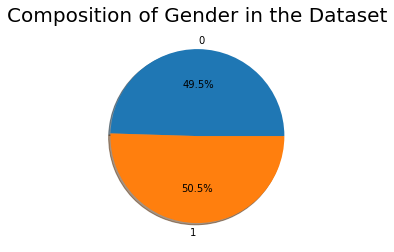

In [ ]:
#to see the composition of gender
out_datareg=pd.DataFrame(biwas.groupby('sex')['sex'].count())


# Plot the pie chart
plt.pie(out_datareg['sex'], labels=['0','1'], autopct='%.1f%%',  radius=1, explode = (0, 0), shadow=True)

# Add a title
plt.title('Composition of Gender in the Dataset',fontsize=20)


# Show the plot
plt.show()


This is a pie chart which gives the informations about the sex column i have used in my datasets where we can clearly see that the ratio of male and female are similarly same but the 1 i.e male has a little bit more percentage than female. where the % carried by male is 51% and female is 49%.

In [ ]:
import plotly.graph_objs as go

out_datareg = pd.DataFrame(biwas.groupby('region')['region'].count())
colors = ['#ff99aa','#6082B6', '#DD7596', '#8EB897']

data = [go.Pie(labels=out_datareg.index, values=out_datareg['region'], marker=dict(colors=colors, line=dict(color='#FFFFFF', width=3.5)))
        ]
layout = go.Layout(title="Composition of Region")
fig = go.Figure(data=data, layout=layout)
fig.show()


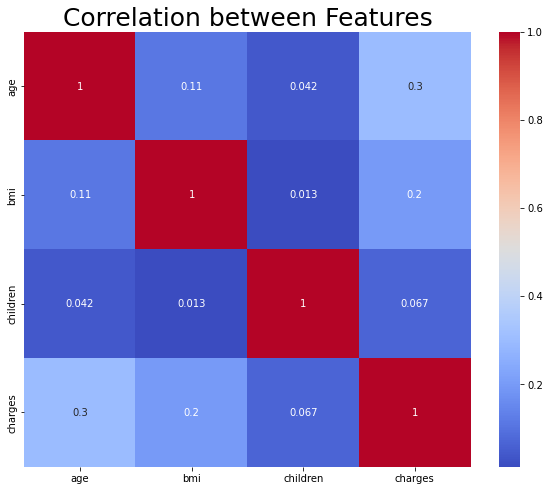

In [ ]:
# Increase figure size
plt.figure(figsize=(10, 8))

# Create heatmap of correlations between features
sns.heatmap(biwas.corr(), annot=True, cmap='coolwarm')

# Add title
plt.title("Correlation between Features",fontsize=25)

# Show plot
plt.show()


This the Correlation diagram which shows the data of age, bmi, children and charges at x axis and charges , children, bmi and age in Y axis.

Text(0.5, 1.0, 'Missing Values Heatmap')

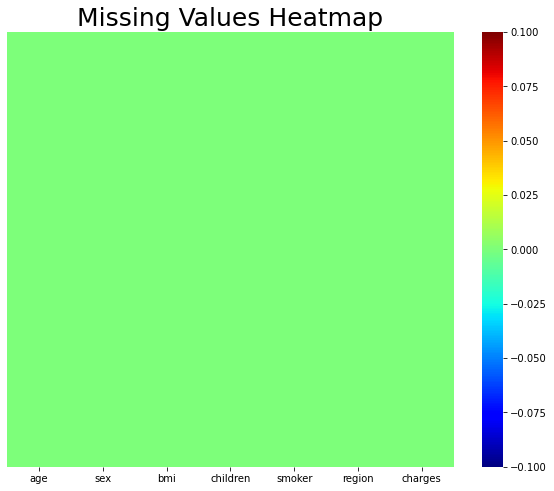

In [ ]:
# Increase figure size
plt.figure(figsize=(10, 8))
sns.heatmap(biwas.isnull(), yticklabels = False, cmap = "jet" ) 
plt.title("Missing Values Heatmap",fontsize=25)

#**Data cleaning and Manipulation**

In [ ]:
biwas.sex.unique()  # Select the sex column from the biwas dataframe to check unique values
         

array(['female', 'male'], dtype=object)

In [ ]:
biwas.smoker.unique() # Select the smoker column from the biwas dataframe to check unique values

array(['yes', 'no'], dtype=object)

This function is used to check the unique character present or not in my datasets where we can clearly see that the sex datasets has the two character only male and female.

In [ ]:
biwas.sex = biwas.sex.map({"male":1, "female":0}) # Use the map method to map the values in the sex column to their numerical equivalents


I have used this functions to change my string values of sex datasets i.e male and female into float values 1 and o where the male represents the 1 and female represents the 0. I have used this datasets to fing the r 2 square beacuse while doing linear regression it doesnt take the string value for calculation.

In [ ]:
biwas.smoker = biwas.smoker.map({"yes":1, "no":0}) # Use the map method to map the values in the smoker column to their numerical equivalents



I have used this functions to change my string values of smoker datasets i.e smoker(yes) and non-smoker(no) into float values 1 and o where the smoker represents the 1 and non-smoker represents the 0. I have used this datasets to find the r 2 square beacuse while doing linear regression it doesnt take the string value for calculation.

In [ ]:
# Calculate the 1st quartile (Q1) of the dataframe
Q1 = biwas.quantile(q=.25)

# Calculate the 3rd quartile (Q3) of the dataframe
Q3 = biwas.quantile(q=.75)

# Calculate the interquartile range (IQR) by subtracting Q1 from Q3
IQR = Q3 - Q1


In [ ]:
# Removing Outliers from the dataset
filtered_datasets =  biwas[~((biwas < (Q1-1.5*IQR)) | (biwas > (Q3+1.5*IQR))).any(axis=1)]
filtered_datasets.dropna()

<ipython-input-970-4ed15b9c40d7>:2: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,southwest,11411.68500
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350


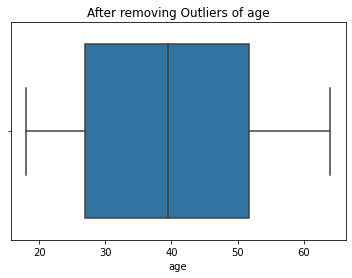

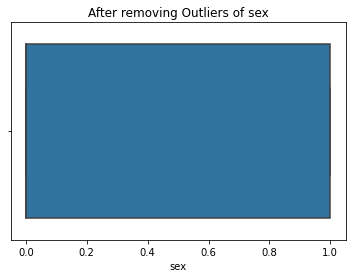

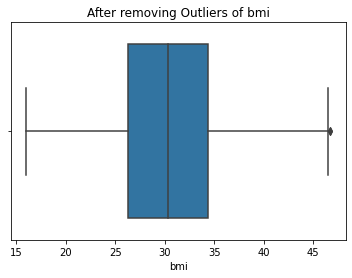

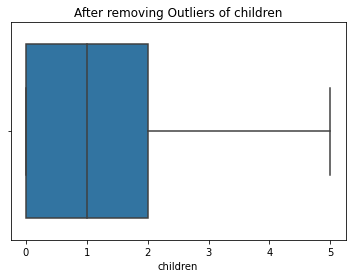

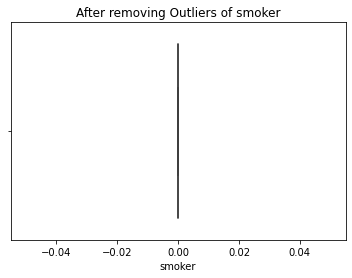

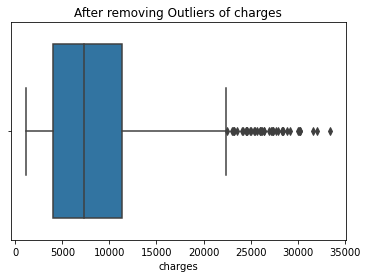

In [ ]:
# Plotting numerical features after removing outliers 
# Check if the variable type is float64 or int64
fnum_variable = (filtered_datasets.dtypes=="float64") | (filtered_datasets.dtypes=="int64")

# Convert the result of the above condition into a list of column names
fnum_variable = filtered_datasets.columns[fnum_variable].tolist()    

# Loop through the list of float64 or int64 variables
for i in fnum_variable:
  # Plot a boxplot for each variable
  sns.boxplot(x=filtered_datasets[i])
  
  # Add a title to the plot indicating which variable is being plotted
  plt.title("After removing Outliers of {}".format(i))
  
  # Display the plot
  plt.show()
  
  # Add a newline for readability
  print('\n')


 **Dropping column:**

In [ ]:
biwas.drop(['region', ], axis=1, inplace=True) #drop the colums
biwas.columns   # checking columns after droping 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

For the preocess of data cleaning and finding the good accuracy i have used this drop function to drop the colums of regions after doing this the entire colums of region will de deleted completely.

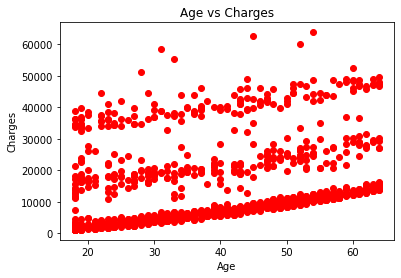

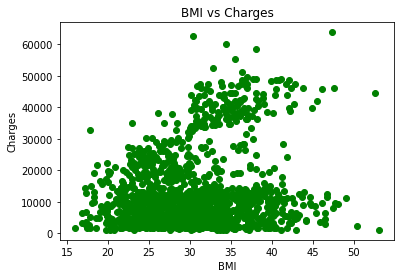

In [ ]:
# Extract the values of 'age', 'bmi', and 'charges' columns
age = biwas['age'].values
bmi = biwas['bmi'].values
charges = biwas['charges'].values

# Plot a scatter plot of 'age' vs 'charges'
plt.scatter(age, charges, color='red')
plt.xlabel("Age") # Label for x-axis
plt.ylabel("Charges") # Label for y-axis
plt.title("Age vs Charges") # Title for the plot
plt.show()

# Plot a scatter plot of 'bmi' vs 'charges'
plt.scatter(bmi, charges, color='green')
plt.xlabel("BMI") # Label for x-axis
plt.ylabel("Charges") # Label for y-axis
plt.title("BMI vs Charges") # Title for the plot
plt.show()


This is a scatter plot where i have used the dependent variable charges as y axis and other two independent variables age and bmi as x axis. This is the scatter plot i have made using the 3 variables age, bmi and charges.

#**Model  Regression and Evaluation Metrics**


Here i have used the sklearn model import train_test_split for finding thex_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) and agin import preprocessing for standarad scaler and finally import linearRegression for accuracy and root mean square Error(rmse) and r 2 square for accuracy.

In [ ]:
# Define the LinearRegression class
class LinearRegression:
    # Initialize the class with a None weight attribute
    def __init__(self):
        self.weights = None

    # Fit the model to the training data
    def fit(self, X, y):
        # Add a column of ones to the X data for the y-intercept
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Calculate the weights using the closed-form solution for linear regression
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    # Predict the values for the test data
    def predict(self, X_test):
        # Add a column of ones to the X_test data for the y-intercept
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        # Return the predictions using the weights and the X_test data
        return X_test @ self.weights

In [ ]:
#creating a function
def cost_function(X, y, weights):
    # calculate number of samples
    m = len(y)
    # calculate dot product of X and weights to get predicted values
    y_pred = X @ weights
    # calculate mean squared error as cost
    cost = (1/(2*m)) * np.sum((y_pred - y)**2)
    return cost
#creating a function
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    # calculate number of samples
    m = len(y)
    # list to store cost for each iteration
    costs = []
    
    # loop for the number of iterations
    for i in range(num_iterations):
        # calculate dot product of X and weights to get predicted values
        y_pred = X @ weights
        # calculate error between predicted and actual values
        error = y_pred - y
        # calculate gradient
        gradient = (1/m) * X.T @ error
        # update weights by subtracting the product of learning rate and gradient
        weights = weights - learning_rate * gradient
        # calculate cost using the cost function
        cost = cost_function(X, y, weights)
        # append the cost to the costs list
        costs.append(cost)
        
    return weights, costs



In [ ]:
# Dependent 
second = biwas['charges']

This is the dependent data of my datasets i have used.All other factors depends on it.

In [ ]:
# Independent 
first = biwas.drop(['charges'], axis = 1)
print(first.shape)
print(first.columns)

(1337, 5)
Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')


The independent variables after my i have droped the region are age, sex, bmi, children, smoker.

In [ ]:
biwas.sample(3)  #sample out 3 data in row

,age,sex,bmi,children,smoker,charges
482,18,0,31.35,0,0,1622.1885
459,40,0,33.00,3,0,7682.6700
83,48,0,41.23,4,0,11033.6617


Checking my remaining colums of my datasets.

In [ ]:
from sklearn.model_selection import train_test_split # importing train test from sk learn

Train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.

In [ ]:
# Split the first and second datasets into training and test sets
first_train, first_test, second_train, second_test = train_test_split(first, second, test_size=0.2, random_state=6)

# Print the shapes of each of the resulting sets
print('Size of first_train = ', first_train.shape)
print('Size of first_test  = ', first_test.shape)
print('Size of second_train = ', second_train.shape)
print('Size of second_test  = ', second_test.shape)


Size of first_train =  (1069, 5)
Size of first_test  =  (268, 5)
Size of second_train =  (1069,)
Size of second_test  =  (268,)


for the process of testing and trainig the data we have first_train and second_train for training and first_test and second_test for testing the data respectively and i have used the test_size as 0.2 and state as 6.

In [ ]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
sc = StandardScaler()


StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way and i have used this for the task of preprocessing one.

In [ ]:
# Fit and transform the first_train data using the StandardScaler instance
first_train = sc.fit_transform(first_train)

# Transform the first_test data using the StandardScaler instance
first_test = sc.transform(first_test)


fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data and i have used it for training the data for first and used for first testing as well.

In [ ]:
# Initialize an instance of the LinearRegression class
model = LinearRegression()

# Fit the model to the first_train and second_train data
model.fit(first_train, second_train)

# Make predictions on the first_test data
second_predict = model.predict(first_test)

# Print the predictions
second_predict

array([ 9659.58316664,  5919.66160481, 14295.41933812, 12740.90114943,
       13161.26551414, 12507.54248775, 29483.29793504, 35726.64609072,
       12138.27931587, 15446.55856496,  6570.53900292, 10649.66757819,
       13619.81733637,  1709.04198959,  2463.35703308, 31572.75038066,
       32696.69075929,  3638.6185641 , 10450.19474369,  1320.77100737,
        3402.86527628, 26799.19521507, 31947.25808724, 10484.14291126,
       11802.01164881, 11249.15504365, 33742.39951425, 35246.19289103,
        9815.65846911, 16235.89688084, 11709.70903084,  9718.48173838,
        8156.87803255,  1184.69923764, 12249.45386234, 30245.72626055,
        4020.95212869, 26758.25524846,   352.2354504 , 13558.06717736,
       11005.03773546, 12820.04513468, 39480.18692778, 12065.53030828,
       31610.98993929, 17349.84329277, 15722.7793769 , 26473.9216354 ,
       14369.35920785, 32517.27367665, 24411.99327958,  9206.95279981,
        7597.63824968, 25958.2992261 , 10000.59382581,  6861.29301237,
      

model.fit() Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained and i have also find the second prediction for first test as well.

In [ ]:
# Import the mean_squared_error and r2_score functions from the sklearn.metrics module
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Create an instance of the LinearRegression class
linreg = LinearRegression()

# Fit the linear regression model to the first_train and second_train data
linreg.fit(first_train, second_train)

# Predict the second target variable using the linear regression model and the first_test data
linreg_pred = linreg.predict(first_test)

# Compute the mean squared error between the actual second_test values and the predicted linreg_pred values
mse = mean_squared_error(second_test, linreg_pred)

# Compute the root mean squared error (RMSE) as the square root of the MSE
rmse = np.sqrt(mse)

# Compute the r-squared score between the actual second_test values and the predicted linreg_pred values
r2 = r2_score(second_test, linreg_pred)

# Calculating the mean absolute error between the predicted and actual target values
mae = mean_absolute_error(second_predict, second_test)


# Print the RMSE and r-squared score
print(" With using Standardize ")
print("Mean Squared Error:", mse)
print("Mean Absolute Error: {:.2f}%".format(mae * 100))
print("Root Mean Squared Error : ", rmse)
print("r2Squared :", r2)

# Print the accuracy of the linear regression model on the test data
print(f"The accuracy on test set using Linear Regression(with standardize) is: {np.round(r2*100,3)}% ")


 With using Standardize 
Mean Squared Error: 33055811.15018698
Mean Absolute Error: 406947.59%
Root Mean Squared Error :  5749.418331465104
r2Squared : 0.7606098164586329
The accuracy on test set using Linear Regression(with standardize) is: 76.061% 


In [ ]:
# Scatter plot of actual vs predicted values
fig = px.scatter(x=second_test, y=linreg_pred)
fig.update_layout(
    title="Scatter Plot of Actual vs Predicted Values with standardize",
    xaxis_title="Actual Values",
    yaxis_title="Predicted Values"
)
fig.show()

# Residual plot
residuals = second_test - linreg_pred
fig = px.scatter(x=linreg_pred, y=residuals)
fig.update_layout(
    title="Residual Plot with standardize",
    xaxis_title="Predicted Values",
    yaxis_title="Residuals"
)
fig.show()

# Distribution plot of residuals
fig = px.histogram(residuals, nbins=30)
fig.update_layout(
    title="Distribution Plot of Residuals with standardize"
)
fig.show()

In [ ]:

# Create a dataframe with actual and predicted values
df = pd.DataFrame({'actual': second_test, 'predicted': linreg_pred})

# Create a surface plot
fig = px.scatter_3d(df, x='actual', y='predicted', z=df.index, color='predicted', size_max=10, opacity=0.8)
fig.update_layout(scene=dict(xaxis_title='Actual Values', yaxis_title='Predicted Values', zaxis_title='Index'))
fig.show()


#**Dimensionality Reduction and Evaluation Metrics**

In [ ]:
from sklearn.decomposition import PCA #importing PCA from Sk learn

pca = PCA(n_components=4) #assigning number of components to do PCA

# Fit and transform the first_train data using the PCA instance
first_train1 = pca.fit_transform(first_train)

# Transform the first_test data using the PCA instance
first_test1 = pca.transform(first_test)

# Initialize an instance of the LinearRegression class
model1 = LinearRegression()

# Fit the model to the first_train and second_train data
model1.fit(first_train1, second_train)

# Make predictions on the first_test data
second_predict1 = model1.predict(first_test1)



In [ ]:
# Create an instance of the LinearRegression class
linreg1 = LinearRegression()

# Fit the linear regression model to the first_train and second_train data
linreg1.fit(first_train1, second_train)

# Predict the second target variable using the linear regression model and the first_test data
linreg_pred1 = linreg1.predict(first_test1)

# Compute the mean squared error between the actual second_test values and the predicted linreg_pred values
mse1 = mean_squared_error(second_test, linreg_pred1)

# Compute the root mean squared error (RMSE) as the square root of the MSE
rmse1 = np.sqrt(mse1)

# Compute the r-squared score between the actual second_test values and the predicted linreg_pred values
r21 = r2_score(second_test, linreg_pred1)

# Calculating the mean absolute error between the predicted and actual target values
mae1 = mean_absolute_error(second_predict1, second_test)


# Print the RMSE and r-squared score
print("With using PCA")
print("Mean Squared Error:", mse1)
print("Mean Absolute Error: {:.2f}%".format(mae1 * 100))
print("Root Mean Squared Error : ", rmse1)
print("r2Squared :", r21)

# Print the accuracy of the linear regression model on the test data
print(f"The accuracy on test set using Linear Regression(with PCA) is: {np.round(r21*100,3)}% ")

With using PCA
Mean Squared Error: 37130437.61401576
Mean Absolute Error: 440246.25%
Root Mean Squared Error :  6093.4750031501535
r2Squared : 0.7311013717072183
The accuracy on test set using Linear Regression(with PCA) is: 73.11% 


In [ ]:
# Scatter plot of actual vs predicted values
fig = px.scatter(x=second_test, y=linreg_pred1)
fig.update_layout(
    title="Scatter Plot of Actual vs Predicted Values with PCA",
    xaxis_title="Actual Values",
    yaxis_title="Predicted Values"
)
fig.show()

# Residual plot
residuals = second_test - linreg_pred1
fig = px.scatter(x=linreg_pred1, y=residuals)
fig.update_layout(
    title="Residual Plot with PCA",
    xaxis_title="Predicted Values",
    yaxis_title="Residuals"
)
fig.show()

# Distribution plot of residuals
fig = px.histogram(residuals, nbins=30)
fig.update_layout(
    title="Distribution Plot of Residuals with PCA"
)
fig.show()

#**Conclusion**

I've finished evaluations. First, I used a standard scalar to standardize the data; the accuracy of my model is 76.06 percent.
Second, I performed PCA to shrink the dimensions of the model, and I was able to get an accuracy of 71.11 percent. My accuracy is remarkably similar when comparing different models.

Linear regression can be used to statistically model a linear relationship between a dependent variable and two or more independent variables. The results of multivariate linear regression are typically presented as a regression equation that captures the relationship between the variables. The effects of each independent variable on the dependent variable can be calculated using the coefficients for each independent variable in the equation. This decrease in accuracy can be attributed to several factors, including:

Loss of Information: PCA reduces the number of features in the dataset, which in turn can also reduce the amount of information available for the model to make predictions. This reduction in information can negatively impact the accuracy of the model.

Overfitting: PCA has the potential to result in overfitting, which is when the model is too closely fit to the training data and its performance decreases on new, unseen data. Overfitting can lead to a decrease in accuracy.

Component Selection: The number of components selected for PCA can also affect the accuracy of the model. If too many components are selected, it can lead to overfitting and a decrease in accuracy. On the other hand, if too few components are selected, the model may not have enough information to make accurate predictions.

It's important to keep in mind that PCA is just one of the many preprocessing techniques that can be applied to a dataset, and its impact on the accuracy of the model can vary depending on the specific problem being addressed. In order to determine the best approach, it's recommended to try different preprocessing techniques and compare their impact on the accuracy of the final model. This will help to determine the best approach for a given problem.



